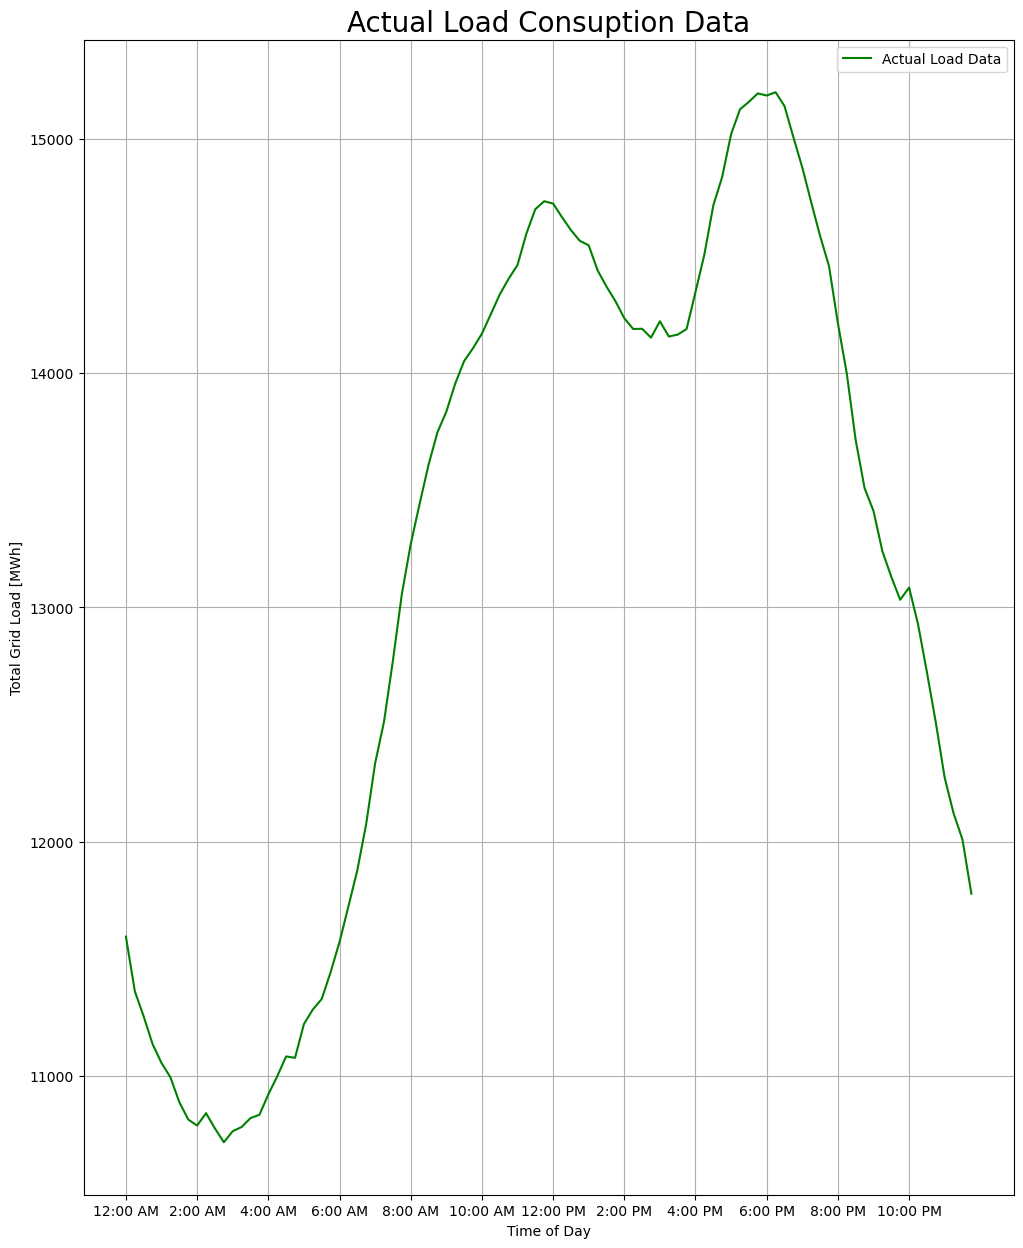

In [39]:
#Author(s) : 1119250

#File: Creating the Actual Load Curve of Germany on my birthday last year i.e., 29th December, 2021 (using csv library)

import matplotlib.pyplot as plt
import csv

x = []
y = []
  
with open("C:/Users/Mridul Mukherjee/Desktop/Database_PSP22/Actual_Consumption.csv",'r') as csvfile:   # Reading in each rows and extracting the values.
    lines = csv.reader(csvfile, delimiter=';')
    next(lines)                                       ## Since the first line is the heading, we would like to skip that.
    for row in lines:
        x.append(row[1])                              ## Appending all the values of the "Time of day" column. 
        row[2] = row[2].replace(',', '')
        y.append(int(row[2]))                         ## Appending all the values of "Grid Load" Column.

# print(x)
# print(y)
fig, ax = plt.subplots(figsize = (12, 15))
plt.plot(x, y, color = 'g',label = "Actual Load Data" )
plt.xticks(x[0::8])
  
plt.xlabel('Time of Day')
plt.ylabel('Total Grid Load [MWh]')
plt.title('Actual Load Consuption Data', fontsize = 20)
plt.grid()
plt.legend()
plt.show()

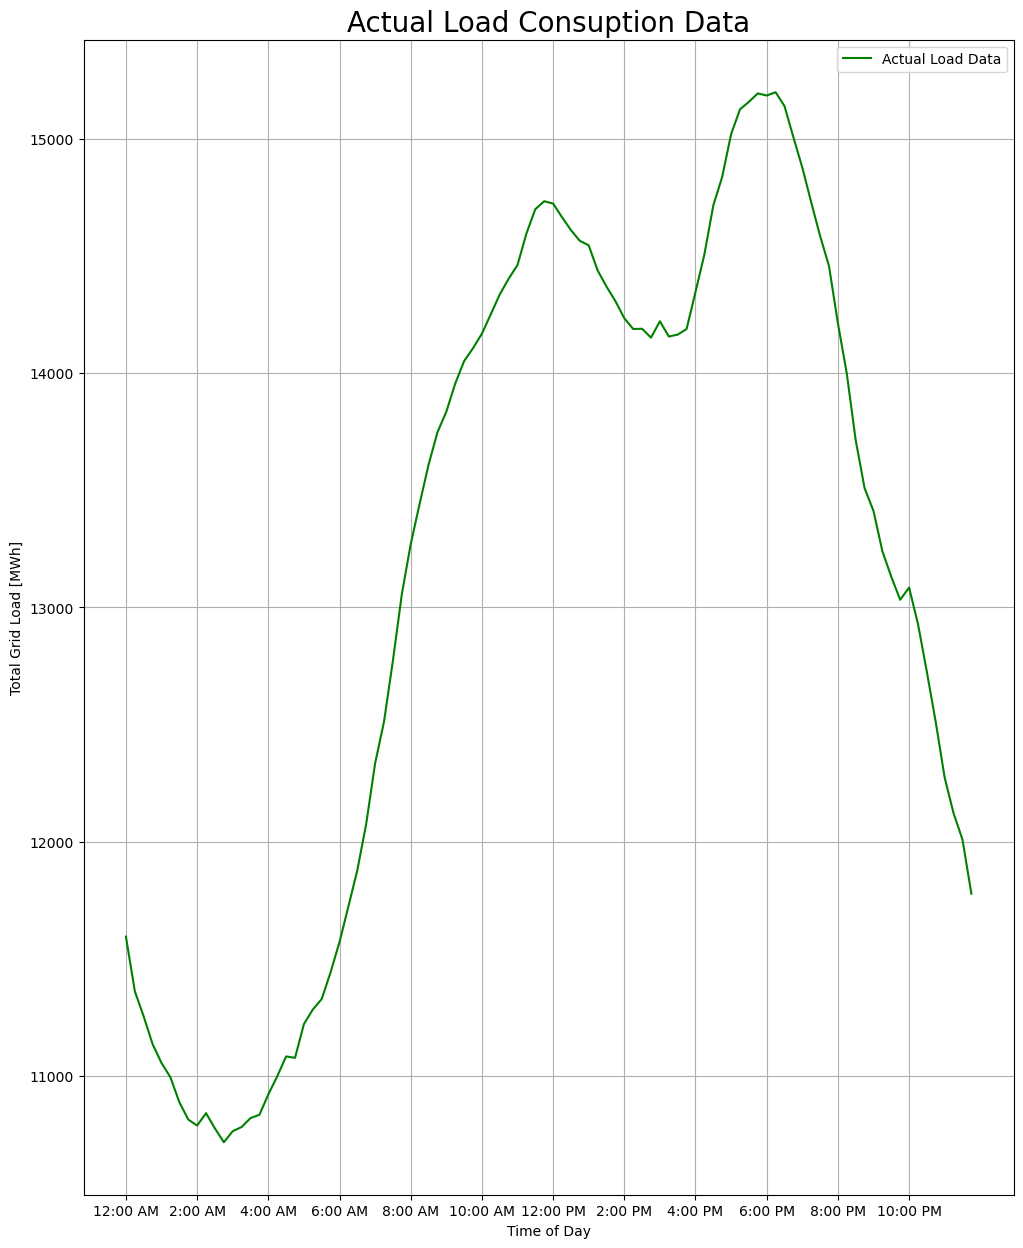

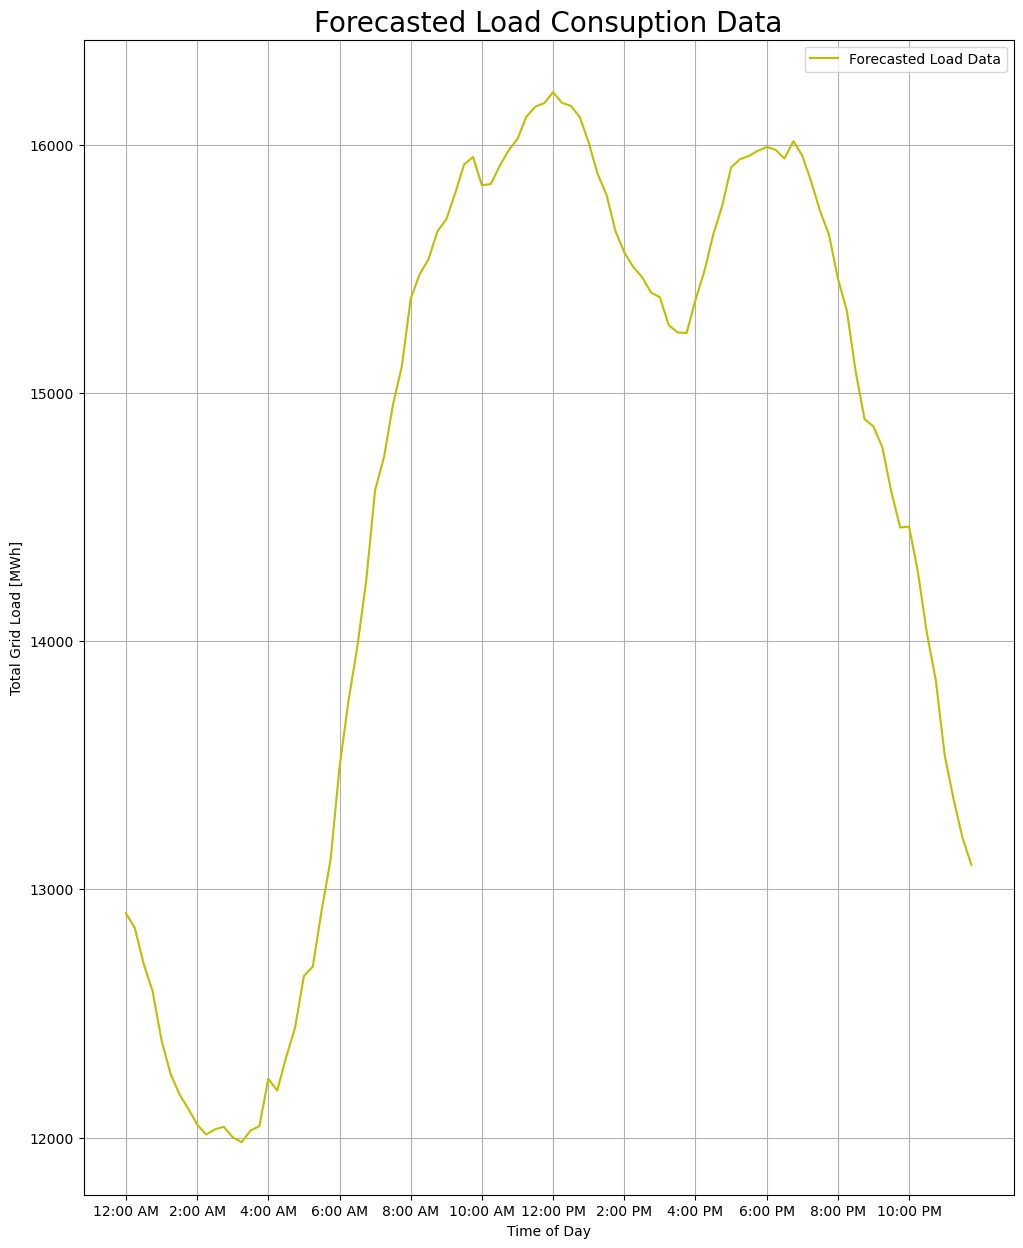

In [43]:
#Author(s) : 1119250

#File: Creating the Actual Load Curve of Germany on my birthday last year i.e., 29th December, 2021 (using pandas library)

import pandas as pd
import matplotlib.pyplot as plt
 
AC = pd.read_csv("C:/Users/Mridul Mukherjee/Desktop/Database_PSP22/Actual_Consumption.csv", sep=';')      # Reading in each rows and extracting the values of the Actual Load data.
y = AC.iloc[:, 2].str.replace(',', '').astype(int)                                                        # Since the data is in String format we need to convert that in int format for better visualization.

FC = pd.read_csv("C:/Users/Mridul Mukherjee/Desktop/Database_PSP22/Forecasted_Consumption.csv", sep=';')  # Reading in each rows and extracting the values of the Forecasted Load data.                                                                                                 
y1 = FC.iloc[:, 2].str.replace(',', '').astype(int)                                                       # Since the data is in String format we need to convert that in int format for better visualization.

fig, ax = plt.subplots(figsize = (12, 15))
plt.plot(AC.iloc[:, 1], y, color = 'g',label = "Actual Load Data" )
plt.xticks(AC.iloc[:, 1][::8])
plt.xlabel('Time of Day')
plt.ylabel('Total Grid Load [MWh]')
plt.title('Actual Load Consuption Data', fontsize = 20)
plt.grid()
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize = (12, 15))
plt.plot(FC.iloc[:, 1], y1, color = 'y',label = "Forecasted Load Data" )
plt.xticks(FC.iloc[:, 1][::8])
plt.xlabel('Time of Day')
plt.ylabel('Total Grid Load [MWh]')
plt.title('Forecasted Load Consuption Data', fontsize = 20)
plt.grid()
plt.legend()
plt.show()


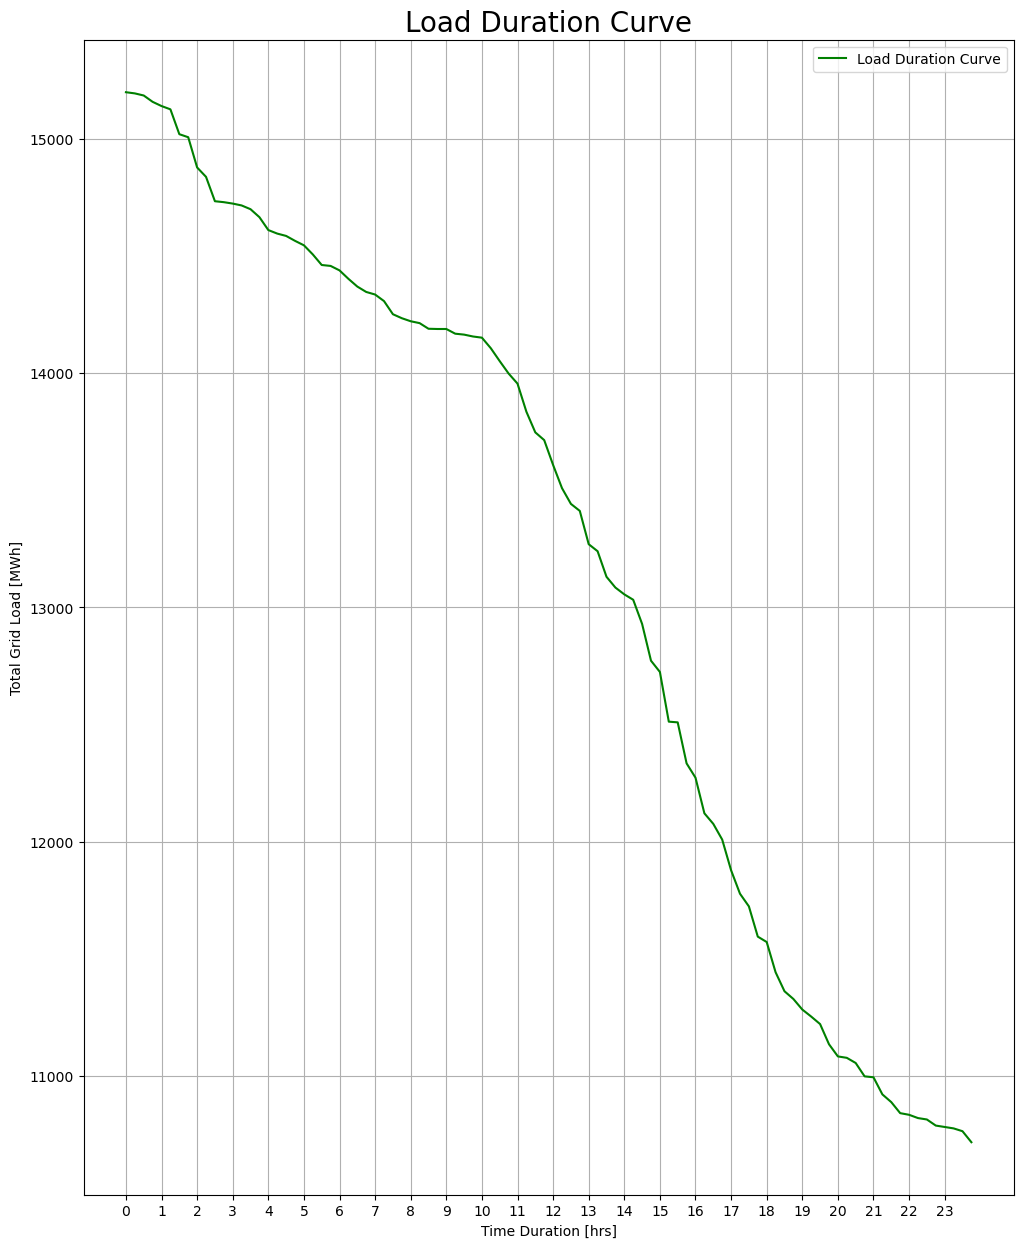

Capacity Factor for the day =   0.7669628953371057
Peak to Min power ratio =  1.4178561432969494
Peak to Mean power ratio =  1.15439172830246


In [3]:
#Author(s) : 1119250

#File: Creating the Load Duration Curve of Germany on my birthday last year i.e., 29th December, 2021 (using pandas library)

import pandas as pd
import matplotlib.pyplot as plt


AC = pd.read_csv("C:/Users/Mridul Mukherjee/Desktop/Database_PSP22/Actual_Consumption.csv", sep=';')  # Reading in each rows and extracting the values of the Actual Load data.
y = AC.iloc[:, 2].str.replace(',', '').astype(int)                                                    # Since the data is in String format we need to convert that in int format for better visualization.
y.sort_values(ascending = False, inplace = True)                                                      # Sorting the Total Grid Load values in descending to get the Load Duration Curve

x = []
for i in range(97):
    i = i/4
    x.append(i)
x.remove(24)                                                        # Just creating the x axis for the curve

fig, ax = plt.subplots(figsize = (12, 15))
plt.plot(x, y, color = 'g',label = "Load Duration Curve" )
plt.xticks(x[::4])                                                  # Only shows the values in x axis which we want to 
plt.xlabel('Time Duration [hrs]')       
plt.ylabel('Total Grid Load [MWh]')
plt.title('Load Duration Curve', fontsize = 20)
plt.grid()
plt.legend()
plt.show()

z = []
for i in range(len(x)):
    z = x[i] * y[i]                             # Calculating the actual energy consumed (Energy = Power * Time) 

CF = z.sum() / (y.max() * 24)                   # Calculating the Capacity Factor for the day i.e, Total Actual Energy Consumed / Max energy that could be consumed
print("Capacity Factor for the day =  ", CF)

Peak_min_ratio = y.max() / y.min()              # Calculating the peak to min power ratio
print("Peak to Min power ratio = ", Peak_min_ratio)

Peak_avg_ratio = y.max() / (y.sum() / len(x))   # Calculating the peak to mean power ratio
print("Peak to Mean power ratio = ",Peak_avg_ratio)